In [319]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

In [320]:
# Let's get txt files in order to crop the heating part
txtfiles_youtube = [
    'Youtube/results/1636825686724-temperatures.txt',
    'Youtube/results/1636825750092-temperatures.txt',
    'Youtube/results/1636825812911-temperatures.txt',
    'Youtube/results/1636825875516-temperatures.txt',
    'Youtube/results/1636825917376-temperatures.txt'
]
txtfiles_flight = [
    'flight/results/1636886045065-temperatures.txt',
    'flight/results/1636886108736-temperatures.txt',
    'flight/results/1636886171292-temperatures.txt',
    'flight/results/1636886233892-temperatures.txt',
    'flight/results/1636886297247-temperatures.txt'
]
txtfiles_video = [
    'VideoShop/results/1636887824731-temperatures.txt',
    'VideoShop/results/1636887888174-temperatures.txt',
    'VideoShop/results/1636887951113-temperatures.txt',
    'VideoShop/results/1636888014329-temperatures.txt',
    'VideoShop/results/1636888077725-temperatures.txt'
]

txtfiles = {
    'youtube': txtfiles_youtube,
    'flight': txtfiles_flight,
    'videoshop': txtfiles_video
}
results = {
    'youtube': {},
    'flight': {},
    'videoshop': {}
}

for txt in txtfiles:
    file_data = txtfiles[txt]
    i = 1
    for filename in file_data:
        cnt = open(filename, 'r').read()
        lines = cnt.split('\n')
        result_for_file = []
        for line in lines:
            line_in_array = []
            numbers = line.split(' ')
            for num in numbers:
                if num != '':
                    line_in_array.append(int(num))
            result_for_file.append(line_in_array)    
        results[txt][f"minute_{i}"] = result_for_file
        i += 1

# Let's convert those array into numpy array

array_results = {
    'youtube': {},
    'flight': {},
    'videoshop': {}
}

for res in results:
    res_data = results[res]
    for file in res_data:
        arr = np.zeros((321, 240))
        min_value = 770000
        max_value = 0
        for line in range(0, len(res_data[file])):
            for num in range(0, len(res_data[file][line])):
                arr[line][num] = res_data[file][line][num]
                if res_data[file][line][num] < min_value:
                    min_value = res_data[file][line][num]
                if res_data[file][line][num] > max_value:
                    max_value = res_data[file][line][num]
        arr = np.delete(arr, -1, axis=0)
        array_results[res][file] = {"array": arr, "min": min_value, "max": max_value}
array_results

{'youtube': {'minute_1': {'array': array([[29701., 29701., 29701., ..., 29689., 29689., 29689.],
          [29700., 29700., 29700., ..., 29688., 29688., 29688.],
          [29699., 29699., 29699., ..., 29687., 29687., 29687.],
          ...,
          [29686., 29686., 29686., ..., 29671., 29671., 29671.],
          [29687., 29687., 29687., ..., 29673., 29673., 29673.],
          [29687., 29687., 29687., ..., 29674., 29674., 29674.]]),
   'min': 29342,
   'max': 29725},
  'minute_2': {'array': array([[29841., 29840., 29841., ..., 29840., 29839., 29839.],
          [29841., 29841., 29841., ..., 29840., 29839., 29839.],
          [29841., 29841., 29841., ..., 29840., 29840., 29840.],
          ...,
          [29826., 29826., 29826., ..., 29806., 29806., 29805.],
          [29825., 29825., 29825., ..., 29806., 29806., 29806.],
          [29825., 29824., 29824., ..., 29806., 29806., 29806.]]),
   'min': 29564,
   'max': 29868},
  'minute_3': {'array': array([[29653., 29653., 29653., ..., 29

In [321]:
extracted_array_results = {
    'youtube': {'minute_1': {}, 'minute_2': {}, 'minute_3': {}, 'minute_4': {}, 'minute_5': {}},
    'flight': {'minute_1': {}, 'minute_2': {}, 'minute_3': {}, 'minute_4': {}, 'minute_5': {}},
    'videoshop': {'minute_1': {}, 'minute_2': {}, 'minute_3': {}, 'minute_4': {}, 'minute_5': {}}
}

phone_extracted_array = {
    'youtube': {'minute_1': {}, 'minute_2': {}, 'minute_3': {}, 'minute_4': {}, 'minute_5': {}},
    'flight': {'minute_1': {}, 'minute_2': {}, 'minute_3': {}, 'minute_4': {}, 'minute_5': {}},
    'videoshop': {'minute_1': {}, 'minute_2': {}, 'minute_3': {}, 'minute_4': {}, 'minute_5': {}}
}

heat_extracted_array = {
    'youtube': {'minute_1': {}, 'minute_2': {}, 'minute_3': {}, 'minute_4': {}, 'minute_5': {}},
    'flight': {'minute_1': {}, 'minute_2': {}, 'minute_3': {}, 'minute_4': {}, 'minute_5': {}},
    'videoshop': {'minute_1': {}, 'minute_2': {}, 'minute_3': {}, 'minute_4': {}, 'minute_5': {}}
}

# Using Blended Images to find the heat area

In [322]:
# Let's create dictionary to find photos
filenames_youtube = [
    'Youtube/results/1636825686724-blended.png',
    'Youtube/results/1636825750092-blended.png',
    'Youtube/results/1636825812911-blended.png',
    'Youtube/results/1636825875516-blended.png',
    'Youtube/results/1636825917376-blended.png'
]

filenames_flight = [
    'flight/results/1636886045065-blended.png',
    'flight/results/1636886108736-blended.png',
    'flight/results/1636886171292-blended.png',
    'flight/results/1636886233892-blended.png',
    'flight/results/1636886297247-blended.png'
]

filenames_video = [
    'VideoShop/results/1636887824731-blended.png',
    'VideoShop/results/1636887888174-blended.png',
    'VideoShop/results/1636887951113-blended.png',
    'VideoShop/results/1636888014329-blended.png',
    'VideoShop/results/1636888077725-blended.png'
]

# Resize all images to make in the same size with txt files' sizes
i = 0
for image in filenames_youtube:
    img = cv2.imread(image, cv2.IMREAD_UNCHANGED)
    img_name = image.split('/')[2]
    print('Original Dimensions : ',img.shape)
    scale_percent = 50 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
  
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    print('Resized Dimensions : ',resized.shape)
    new_location = f"Youtube/resized/{img_name}"
    cv2.imwrite(new_location, resized)
    filenames_youtube[i] = new_location
    i += 1

# REsize flight pictures
i = 0
for image in filenames_flight:
    img = cv2.imread(image, cv2.IMREAD_UNCHANGED)
    img_name = image.split('/')[2]
    print('Original Dimensions : ',img.shape)
    scale_percent = 50 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
  
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    print('Resized Dimensions : ',resized.shape)
    new_location = f"flight/resized/{img_name}"
    cv2.imwrite(new_location, resized)
    filenames_flight[i] = new_location
    i += 1

i = 0
for image in filenames_video:
    img = cv2.imread(image, cv2.IMREAD_UNCHANGED)
    img_name = image.split('/')[2]
    print('Original Dimensions : ',img.shape)
    scale_percent = 50 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
  
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    print('Resized Dimensions : ',resized.shape)
    new_location = f"VideoShop/resized/{img_name}"
    cv2.imwrite(new_location, resized)
    filenames_video[i] = new_location
    i += 1


filenames = {
    'youtube': filenames_youtube,
    'flight': filenames_flight,
    'videoshop': filenames_video
}

Original Dimensions :  (640, 480, 4)
Resized Dimensions :  (320, 240, 4)
Original Dimensions :  (640, 480, 4)
Resized Dimensions :  (320, 240, 4)
Original Dimensions :  (640, 480, 4)
Resized Dimensions :  (320, 240, 4)
Original Dimensions :  (640, 480, 4)
Resized Dimensions :  (320, 240, 4)
Original Dimensions :  (640, 480, 4)
Resized Dimensions :  (320, 240, 4)
Original Dimensions :  (640, 480, 4)
Resized Dimensions :  (320, 240, 4)
Original Dimensions :  (640, 480, 4)
Resized Dimensions :  (320, 240, 4)
Original Dimensions :  (640, 480, 4)
Resized Dimensions :  (320, 240, 4)
Original Dimensions :  (640, 480, 4)
Resized Dimensions :  (320, 240, 4)
Original Dimensions :  (640, 480, 4)
Resized Dimensions :  (320, 240, 4)
Original Dimensions :  (640, 480, 4)
Resized Dimensions :  (320, 240, 4)
Original Dimensions :  (640, 480, 4)
Resized Dimensions :  (320, 240, 4)
Original Dimensions :  (640, 480, 4)
Resized Dimensions :  (320, 240, 4)
Original Dimensions :  (640, 480, 4)
Resized Dimens

In [323]:
# Let's get the phone part from the pictures
for app in filenames:
    app_data = filenames[app]
    for file in range(0, len(app_data)):
        # Load image, convert to grayscale, and find edges
        image = cv2.imread(app_data[file])
        print(f"Reading File {app_data[file]} with {image.shape} shape")
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

        # Find contour and sort by contour area
        cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

        # Find bounding box and extract ROI
        for c in cnts:
            x,y,w,h = cv2.boundingRect(c)
            ROI = image[y:y+h, x:x+w]
            heat_array = array_results[app][f'minute_{file+1}']['array']
            heat_values = heat_array[y:y+h, x:x+w]
            phone_extracted_array[app][f'minute_{file+1}']['array']=heat_values
            print(f"Result dimension {ROI.shape}")
            print(f"Result array(from txt) size: {heat_values.shape}")
            print(ROI.shape[0:2]==heat_values.shape)
            break
        cv2.imwrite(f'Pictures_last/{app}/phone/phone_part_image_{file}.png',ROI)
        print('---------------------------')

Reading File Youtube/resized/1636825686724-blended.png with (320, 240, 3) shape
Result dimension (320, 240, 3)
Result array(from txt) size: (320, 240)
True
---------------------------
Reading File Youtube/resized/1636825750092-blended.png with (320, 240, 3) shape
Result dimension (320, 240, 3)
Result array(from txt) size: (320, 240)
True
---------------------------
Reading File Youtube/resized/1636825812911-blended.png with (320, 240, 3) shape
Result dimension (320, 240, 3)
Result array(from txt) size: (320, 240)
True
---------------------------
Reading File Youtube/resized/1636825875516-blended.png with (320, 240, 3) shape
Result dimension (106, 88, 3)
Result array(from txt) size: (106, 88)
True
---------------------------
Reading File Youtube/resized/1636825917376-blended.png with (320, 240, 3) shape
Result dimension (144, 154, 3)
Result array(from txt) size: (144, 154)
True
---------------------------
Reading File flight/resized/1636886045065-blended.png with (320, 240, 3) shape
Res

In [324]:
# Let's do extraction again on extracted images
for app in filenames:
    app_data = filenames[app]
    for file in range(0, len(app_data)):
        # Load image, convert to grayscale, and find edges
        image = cv2.imread(f'Pictures_last/{app}/phone/phone_part_image_{file}.png')
        print(f"Reading file {app_data[file]}, size {image.shape}")
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 179, 255,cv2.THRESH_BINARY)[1]

        # Find contour and sort by contour area
        cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

        # Find bounding box and extract ROI
        for c in cnts:
            x,y,w,h = cv2.boundingRect(c)
            ROI = image[y:y+h, x:x+w]
            heat_array = phone_extracted_array[app][f'minute_{file+1}']['array']
            heat_values = heat_array[y:y+h, x:x+w]
            heat_extracted_array[app][f'minute_{file+1}']['array']=heat_values
            
            print(f"Result dimension {ROI.shape}")
            print(f"Result array(from txt) size: {heat_values.shape}")
            print(ROI.shape[0:2]==heat_values.shape)
            
            break
        cv2.imwrite(f'Pictures_last/{app}/heat/heat_part_image_{file}.png',ROI)
        print("----------------------------")

Reading file Youtube/resized/1636825686724-blended.png, size (320, 240, 3)
Result dimension (320, 240, 3)
Result array(from txt) size: (320, 240)
True
----------------------------
Reading file Youtube/resized/1636825750092-blended.png, size (320, 240, 3)
Result dimension (320, 240, 3)
Result array(from txt) size: (320, 240)
True
----------------------------
Reading file Youtube/resized/1636825812911-blended.png, size (320, 240, 3)
Result dimension (40, 68, 3)
Result array(from txt) size: (40, 68)
True
----------------------------
Reading file Youtube/resized/1636825875516-blended.png, size (106, 88, 3)
Result dimension (61, 73, 3)
Result array(from txt) size: (61, 73)
True
----------------------------
Reading file Youtube/resized/1636825917376-blended.png, size (144, 154, 3)
Result dimension (52, 74, 3)
Result array(from txt) size: (52, 74)
True
----------------------------
Reading file flight/resized/1636886045065-blended.png, size (320, 240, 3)
Result dimension (219, 240, 3)
Result a

In [325]:
# Again one more extraction on heat part
print("**Trying to get heat part**")
for app in filenames:
    app_data = filenames[app]
    for file in range(0, len(app_data)):
        # load image as grayscale
        img = cv2.imread(f'Pictures_last/{app}/heat/heat_part_image_{file}.png')

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # threshold input image using otsu thresholding as mask and refine with morphology
        ret, mask = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY) 
        kernel = np.ones((9,9), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

        # put mask into alpha channel of result
        result = img.copy()
        result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
        result[:, :, 3] = mask
        result = cv2.bitwise_and(result, result, mask=mask)
        # save resulting masked image
        cv2.imwrite(f'Pictures_last/{app}/heat_mask/heat_mask_image_{file}.png', result)
        cv2.waitKey()

**Trying to get heat part**


# Using the extracted part, let's get those area from the heating txt files

In [326]:
# Read mask and use on txt file
for app in filenames:
    app_data = filenames[app]
    for file in range(0, len(app_data)):
        # Load mask image
        img = cv2.imread(f'Pictures_last/{app}/heat_mask/heat_mask_image_{file}.png')  
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        print(f"Reading heat_mask)image_{file}.png | size: {img.shape}")
        for row in range(0, len(gray)):
            for column in range(0, len(gray[row])):
                if gray[row][column] == 0:
                    heat_extracted_array[app][f'minute_{file+1}']['array'][row][column] = 0

Reading heat_mask)image_0.png | size: (320, 240, 3)
Reading heat_mask)image_1.png | size: (320, 240, 3)
Reading heat_mask)image_2.png | size: (40, 68, 3)
Reading heat_mask)image_3.png | size: (61, 73, 3)
Reading heat_mask)image_4.png | size: (52, 74, 3)
Reading heat_mask)image_0.png | size: (219, 240, 3)
Reading heat_mask)image_1.png | size: (67, 65, 3)
Reading heat_mask)image_2.png | size: (92, 64, 3)
Reading heat_mask)image_3.png | size: (92, 64, 3)
Reading heat_mask)image_4.png | size: (92, 65, 3)
Reading heat_mask)image_0.png | size: (320, 240, 3)
Reading heat_mask)image_1.png | size: (137, 118, 3)
Reading heat_mask)image_2.png | size: (95, 65, 3)
Reading heat_mask)image_3.png | size: (65, 65, 3)
Reading heat_mask)image_4.png | size: (23, 39, 3)


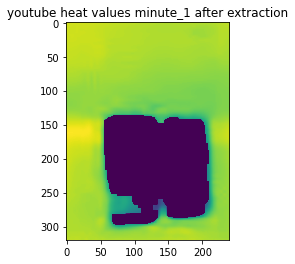

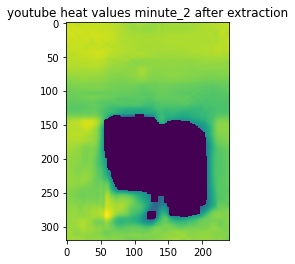

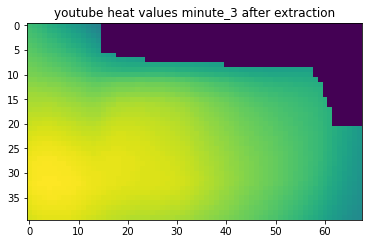

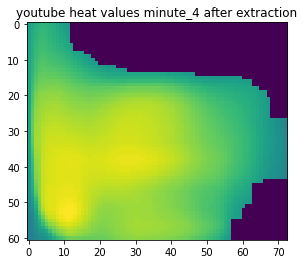

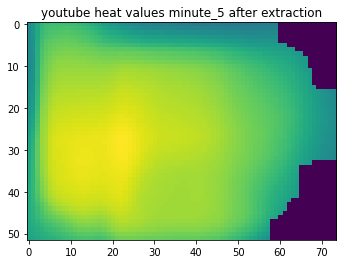

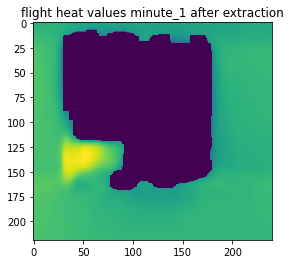

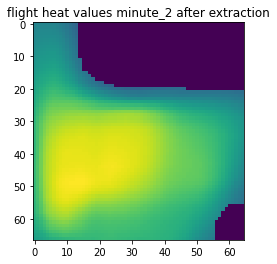

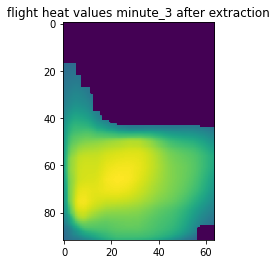

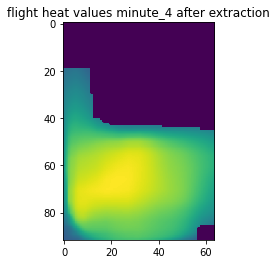

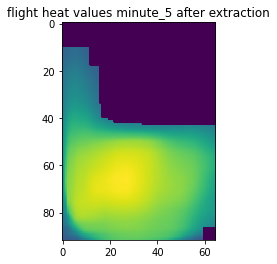

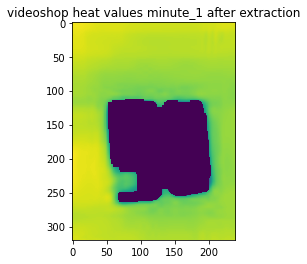

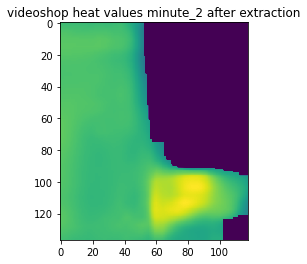

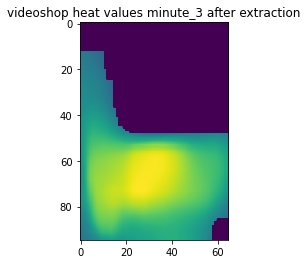

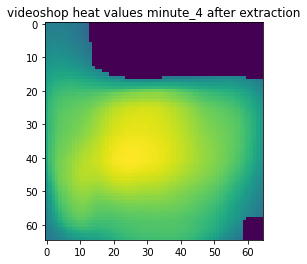

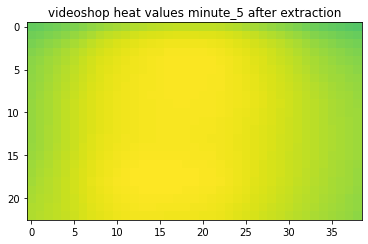

In [327]:
for app in heat_extracted_array:
    app_data = heat_extracted_array[app]
    for minute in app_data:
        # Plot for youtube
        plt.imshow(app_data[minute]['array'],vmin=array_results[app][minute]['min'], vmax=array_results[app][minute]['max'])
        plt.title(f"{app} heat values {minute} after extraction")
        plt.show()

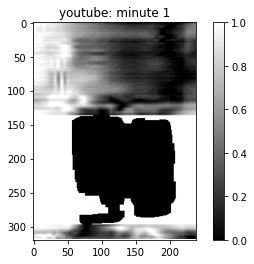

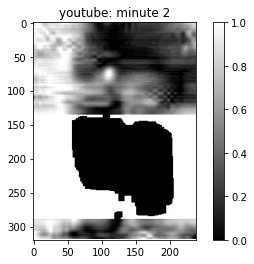

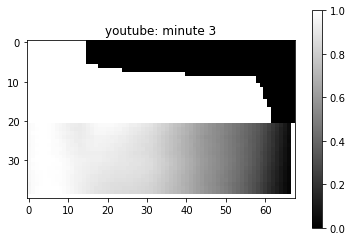

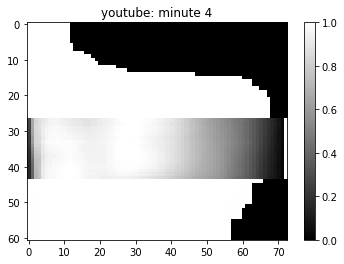

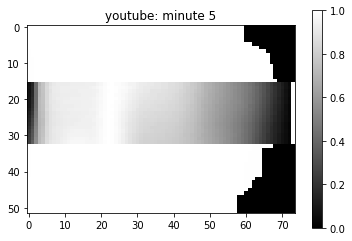

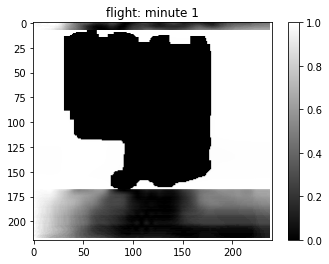

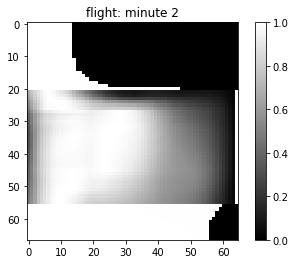

<ipython-input-328-e72625a323ea>:12: RuntimeWarning: invalid value encountered in double_scalars
  array[row][num] = (array[row][num]-min_num)/(max_num-min_num)


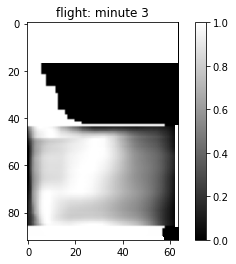

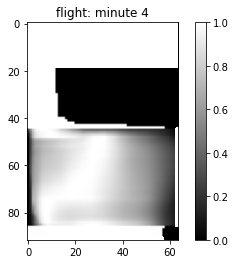

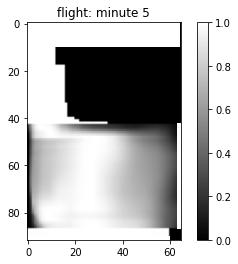

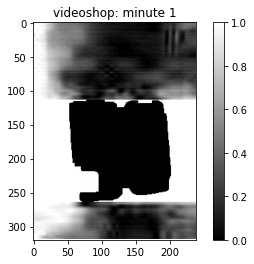

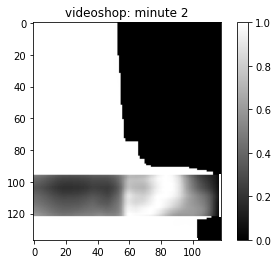

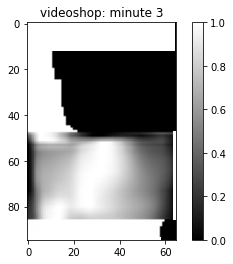

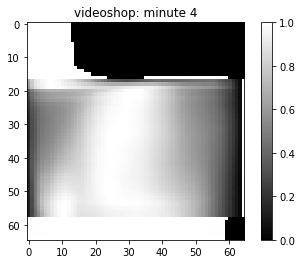

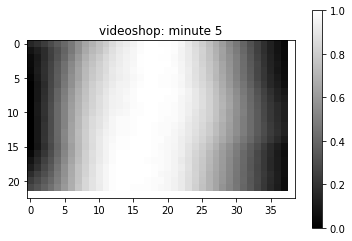

In [328]:
# Let's normalize them
heat_extracted_array_copy = copy.deepcopy(heat_extracted_array)
for app in heat_extracted_array_copy:
    app_data = heat_extracted_array_copy[app]
    for minute in app_data:
        array = app_data[minute]['array']
        for row in range(0, len(array)-1):
            line = array[row]
            min_num = min(line)
            max_num = max(line)
            for num in range(0, len(line)-1):
                array[row][num] = (array[row][num]-min_num)/(max_num-min_num)
        # Plot it
        plt.imshow(app_data[minute]['array'], cmap='gray', vmin=0, vmax=1)
        plt.colorbar()
        plt.title(f"{app}: {minute.replace('_', ' ')}")
        plt.show()

# Doing manual removals just in case

In [329]:
manual_algorithm_results = {
    'youtube': {'minute_1': {}, 'minute_2': {}, 'minute_3': {}, 'minute_4': {}, 'minute_5': {}},
    'flight': {'minute_1': {}, 'minute_2': {}, 'minute_3': {}, 'minute_4': {}, 'minute_5': {}},
    'videoshop': {'minute_1': {}, 'minute_2': {}, 'minute_3': {}, 'minute_4': {}, 'minute_5': {}}
}

In [330]:
# Manual removals
extracted_array_results = copy.deepcopy(heat_extracted_array)
for app in extracted_array_results:
    app_data = extracted_array_results[app]
    for minute in app_data:
        arr = app_data[minute]['array']
        num_rows, num_cols = arr.shape
        new_arr = []
        for line in range(0, num_rows):
            row = arr[line]
#             new_arr.append(row)
            max_dif = 0
            for num in range(1, num_cols):
                diff = abs(row[num] - row[num-1])
                if diff > max_dif:
                    max_dif = diff
            if max_dif > 7:
                new_arr.append(row)
        new_arr = np.array(new_arr)
        manual_algorithm_results[app][minute]['array'] = new_arr

for app in manual_algorithm_results:
    app_data = manual_algorithm_results[app]
    # Column based removal
    for minute in app_data:
        # Column based removal
        new_arr = app_data[minute]['array']
        num_rows, num_cols = new_arr.shape
        new_arr_2 = []
        for line in range(0, num_cols-1):
            column = new_arr.T[line]
            max_dif = 0
            for num in range(1, num_rows-1):
                diff = abs(column[num] - column[num-1])
                if diff > max_dif:
                    max_dif = diff
            if max_dif > 8:
                new_arr_2.append(column)
        new_arr_2 = np.array(new_arr_2).T
        manual_algorithm_results[app][minute]['array'] = new_arr_2

In [331]:
for app in manual_algorithm_results:
    app_data = manual_algorithm_results[app]
    # Remove number which is less than mean value
    for minute in app_data:
        minute_array = app_data[minute]
        for line in range(0, len(minute_array['array'])):
            line_array = minute_array['array'][line]
            mean = np.mean(line_array)
            for num in range(0, len(line_array)):
                if line_array[num] <= mean:
                    line_array[num] = 0

    # Remove number which is less than mean value in column
    for minute in app_data:
        minute_array = app_data[minute]['array'].T
        for line in range(0, len(minute_array)):
            line_array = minute_array[line]
            mean = np.mean(line_array)
            for num in range(0, len(line_array)):
                if line_array[num] <= mean:
                    line_array[num] = 0

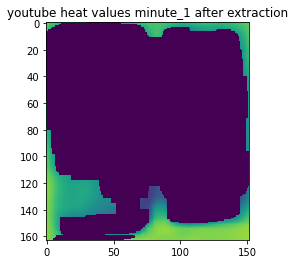

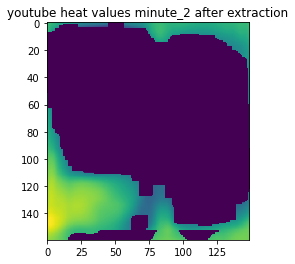

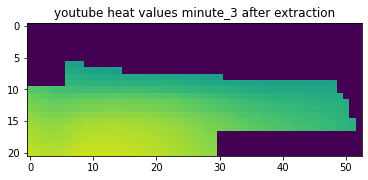

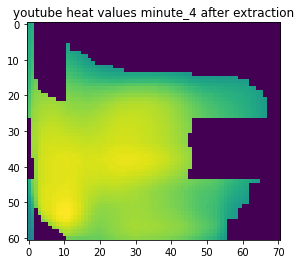

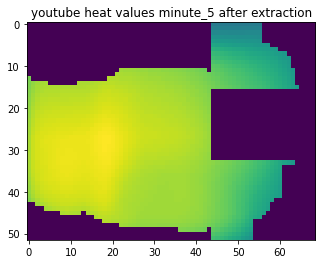

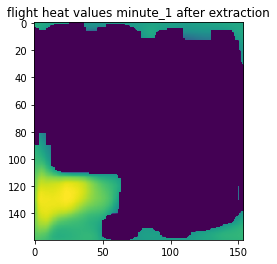

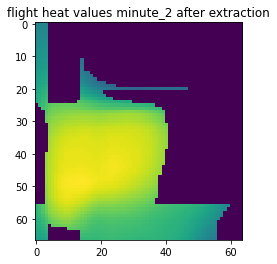

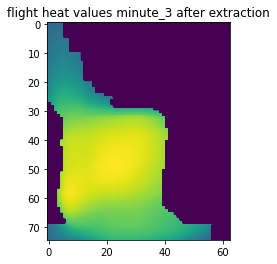

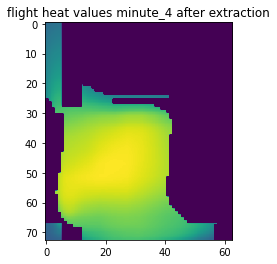

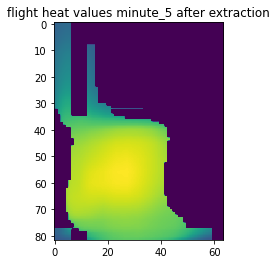

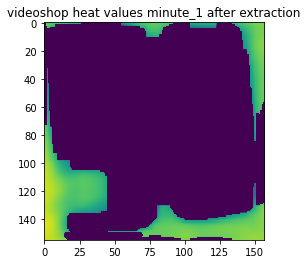

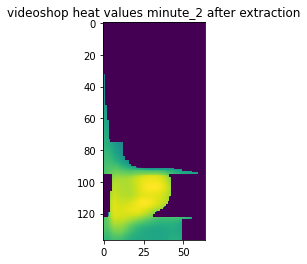

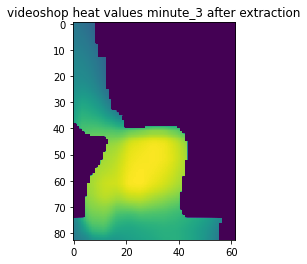

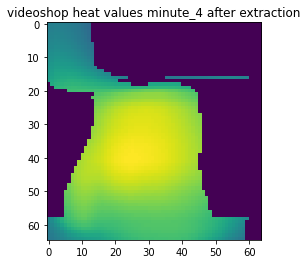

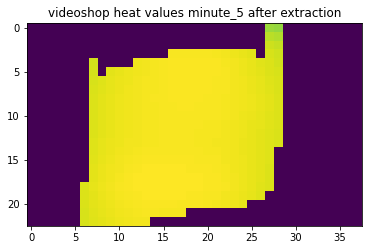

In [332]:
for app in manual_algorithm_results:
    app_data = manual_algorithm_results[app]
    for minute in app_data:
        # Plot for youtube
        plt.imshow(app_data[minute]['array'], vmin=array_results[app][minute]["min"], vmax=array_results[app][minute]['max'])
        plt.title(f"{app} heat values {minute} after extraction")
        plt.show()

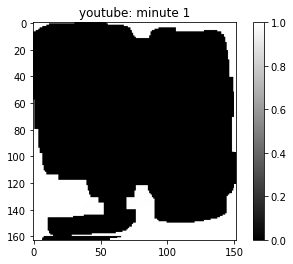

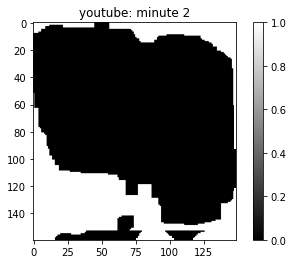

<ipython-input-333-28a1f68d0d36>:13: RuntimeWarning: invalid value encountered in double_scalars
  array[row][num] = (array[row][num]-min_num)/(max_num-min_num)


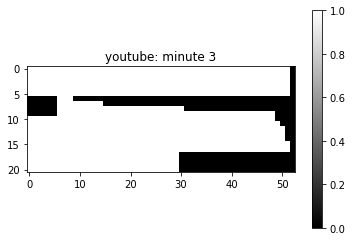

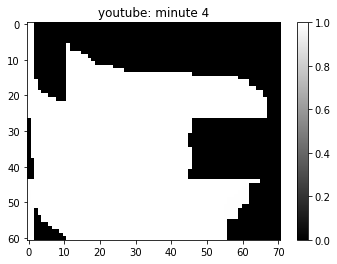

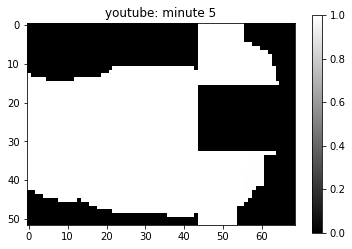

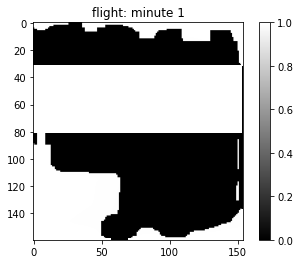

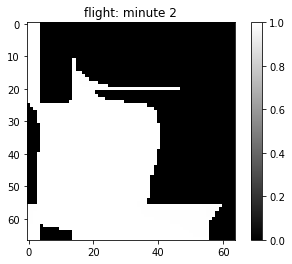

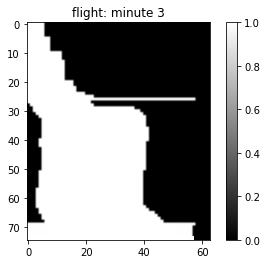

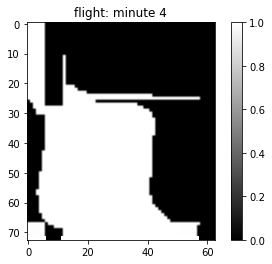

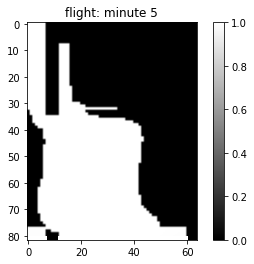

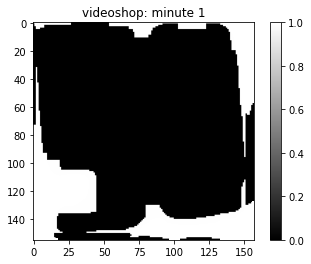

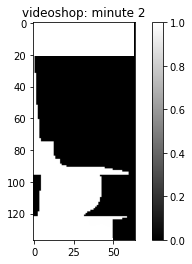

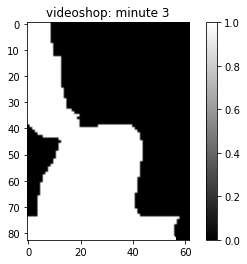

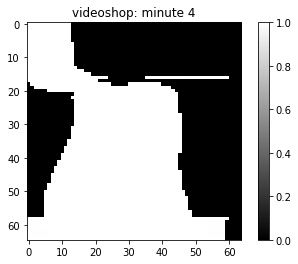

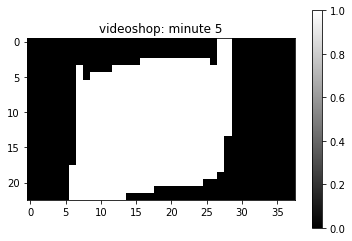

In [333]:
# Normalization of last one
# Let's normalize them
manual_algorithm_results_copy = copy.deepcopy(manual_algorithm_results)
for app in manual_algorithm_results_copy:
    app_data = manual_algorithm_results_copy[app]
    for minute in app_data:
        array = app_data[minute]['array']
        for row in range(0, len(array)-1):
            line = array[row]
            min_num = min(line)
            max_num = max(line)
            for num in range(0, len(line)-1):
                array[row][num] = (array[row][num]-min_num)/(max_num-min_num)
        # Plot it
        plt.imshow(app_data[minute]['array'], cmap='gray', vmin=0, vmax=1)
        plt.colorbar()
        plt.title(f"{app}: {minute.replace('_', ' ')}")
        plt.show()